In [106]:
import math as m
import random as r
import matplotlib.pyplot as plt

In [107]:
def func(x1, x2):
    return 3 - m.pow(x1,2) - m.pow(x2,2)


In [108]:
class Bee():
    def __init__(self, x, y, func, max_trials, min, max):
        self.x = x
        self.y = y
        self.min = min
        self.max = max
        self.func = func
        self.score = func(x,y)
        self.max_trials = max_trials
        self.trials = 0

    def update(self, new_x, new_y):
        if (new_x > self.max or new_x < self.min or new_y > self.max or new_y < self.min):
            self.trials += 1
        else:
            new_score = self.func(new_x, new_y)
            if new_score >= self.score:
                self.x = new_x
                self.y = new_y
                self.score = new_score
                self.trials = 0
            else:
                self.trials += 1

    def scout(self, new_x, new_y):
        self.x = new_x
        self.y = new_y
        self.score = self.func(new_x, new_y)
        self.trials = 0

class Employed_Bee(Bee):
    def explore(self):
        if self.trials <= self.max_trials:
            if r.randint(0,1) == 0:
                new_x = self.x + self.x * r.uniform(-1,1)
                new_y = self.y
            else:
                new_y = self.y + self.y * r.uniform(-1,1)
                new_x = self.x
            self.update(new_x, new_y)
        else:
            self.scout(r.randint(self.min,self.max), r.randint(self.min,self.max))
    

class Onlooker_Bee(Bee):
    def exploit(self, candidates, bee_probs):
        if self.trials <= self.max_trials:
            candidate = r.choices(candidates, bee_probs)[0]
            new_x = candidate.x + candidate.x * r.uniform(-1,1)
            new_y = candidate.y + candidate.y * r.uniform(-1,1)

            self.update(new_x, new_y)
        else:
            self.scout(r.randint(self.min,self.max), r.randint(self.min,self.max))
        


In [109]:
def init_colony(num_bees, min, max):
    employed_bees = []
    onlooker_bees = []

    for i in range(0,num_bees):
        employed_bees.append(
            Employed_Bee(r.randint(min,max), r.randint(min,max), func, 5, min, max)
        )
        onlooker_bees.append(
            Onlooker_Bee(r.randint(min,max), r.randint(min,max), func, 5, min, max)
        )

    return employed_bees, onlooker_bees

In [110]:
def get_probabilites(employed_bees, sum_scores):
    return [bee.score/sum_scores for bee in employed_bees]

In [111]:
def plot_colony(employed_bees, onlooker_bees, min, max):
    employed_bees_x = []
    employed_bees_y = []
    onlooker_bees_x = []
    onlooker_bees_y = []

    for bee in employed_bees:
        employed_bees_x.append(bee.x)
        employed_bees_y.append(bee.y)

    for bee in onlooker_bees:
        onlooker_bees_x.append(bee.x)
        onlooker_bees_y.append(bee.y)
    
    plt.xlim(left=min-1, right=max+1)
    plt.ylim(bottom=min-1, top=max+1)
    plt.scatter(employed_bees_x, employed_bees_y, color="yellow", alpha=0.5, s=100)
    plt.scatter(onlooker_bees_x, onlooker_bees_y, color="red", alpha=0.3, s=100)
    plt.show()

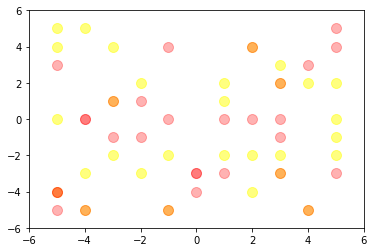

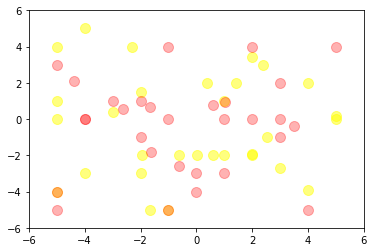

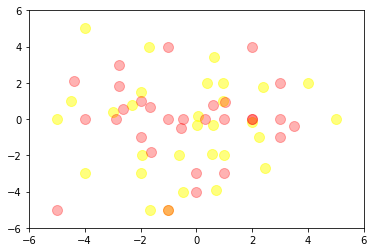

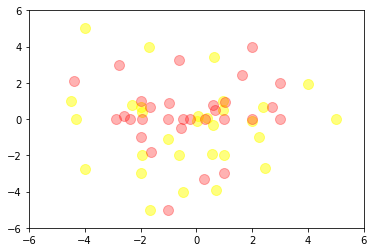

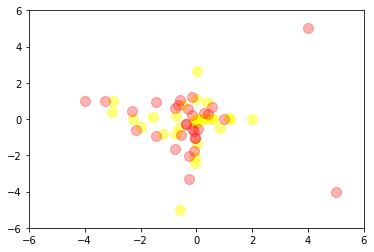

(2.9999070300866584, 0.009636666757625504, 0.0003233684339371823)

In [112]:

def run_colony(num_bees=30, num_iter=10, min=-5, max=5):
    employed_bees, onlooker_bees = init_colony(num_bees, min, max)
    sum_scores = 0
    bee_probs = []
    optimal_score = employed_bees[0].score
    optimal_pos_x = employed_bees[0].x
    optimal_pos_y = employed_bees[0].y

    plot_colony(employed_bees, onlooker_bees, min, max)
    

    for i in range(num_iter):
        for bee in employed_bees:
            bee.explore()
            sum_scores += bee.score
            if bee.score > optimal_score:
                optimal_score = bee.score
                optimal_pos_x = bee.x
                optimal_pos_y = bee.y
        bee_probs = get_probabilites(employed_bees, sum_scores)

        for bee in onlooker_bees:
            bee.exploit(employed_bees, bee_probs)
            if bee.score > optimal_score:
                optimal_score = bee.score
                optimal_pos_x = bee.x
                optimal_pos_y = bee.y
                
        if i < 3:
            plot_colony(employed_bees, onlooker_bees, min, max)

    plot_colony(employed_bees, onlooker_bees, min, max)

    return optimal_score, optimal_pos_x, optimal_pos_y

        
run_colony()